# GBA 6070 - Programming Foundation for Business Analytics
# Dr. Mohammad Salehan
# Final Exam
Enter your name below.

In this exam you will work with the weather dataset. Let's start with loading the dataset.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
weather = pd.read_csv('weather2 (1).csv')

We also use another dataset that contains information about each weather station.

In [3]:
stations = pd.read_excel('Station Information (1).xlsx')

1. Examine the shape of the both dataframes (1 points).

In [4]:
weather.shape

(100000, 14)

In [5]:
stations.shape

(29745, 10)

2. Check the top 5 rows of each dataframe to see what they look like (1 points).

In [6]:
weather.head

<bound method NDFrame.head of        Unnamed: 0  station_wban    year  month   day  hour  temperature  \
0               0  841170-99999  2010.0    1.0  15.0  16.0        270.0   
1               1  841170-99999  2010.0    1.0  15.0  17.0        270.0   
2               2  841170-99999  2010.0    1.0  15.0  18.0        276.0   
3               3  841170-99999  2010.0    1.0  15.0  19.0        280.0   
4               4  841170-99999  2010.0    1.0  15.0  20.0        280.0   
...           ...           ...     ...    ...   ...   ...          ...   
99995       99995  785350-11630  2011.0    9.0  29.0  20.0        306.0   
99996       99996  785350-11630  2011.0    9.0  29.0  21.0        289.0   
99997       99997  785350-11630  2011.0    9.0  29.0  22.0        272.0   
99998       99998  785350-11630  2011.0    9.0  29.0  23.0        256.0   
99999       99999  785350-11630  2011.0    9.0  30.0   0.0        250.0   

       dew_point  pressure  wind_direction  wind_speed  sky_condition

In [7]:
stations.head

<bound method NDFrame.head of          USAF   WBAN                   STATION NAME CTRY  ST CALL     LAT  \
0        7018  99999                     WXPOD 7018  NaN      NaN   0.000   
1        7026  99999                     WXPOD 7026   AF      NaN   0.000   
2        7070  99999                     WXPOD 7070   AF      NaN   0.000   
3        8260  99999                      WXPOD8270  NaN      NaN   0.000   
4        8268  99999                      WXPOD8278   AF      NaN  32.950   
...       ...    ...                            ...  ...      ...     ...   
29740  A07355    241      VIROQUA MUNICIPAL AIRPORT   US  WI KY51  43.579   
29741  A07357    182  ELBOW LAKE MUNICIPAL PRIDE OF   US  MN KY63  45.986   
29742  A07359    240           IONIA COUNTY AIRPORT   US  MI KY70  42.938   
29743  A51255    445    DEMOPOLIS MUNICIPAL AIRPORT   US  AL KDYA  32.464   
29744  A51256    451  BRANSON WEST MUNICIPAL EMERSO   US  MO KFWB  36.699   

          LON  ELEV(M)     BEGIN       END  


3. Drop the first column (Unnamed) from weather, then display the top row (1 points).

In [8]:
weather = weather.iloc[:, 1:]
weather.head(1)

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,-9999.0,300.0,51.0,7.0,-9999.0,-9999.0


4. Combine ``USAF`` and ``WBAN`` columns of ``stations`` ``DataFrame`` to create a new column named ``station_wban`` that looks like the one in ``weather`` ``DataFrame`` (``USAF_WBAN``) (1 points).

In [9]:
stations['station_wban'] = stations['USAF'].astype(str) + '-' + stations['WBAN'].astype(str)
stations.head(1)

,USAF,WBAN,STATION NAME,CTRY,ST CALL,LAT,LON,ELEV(M),BEGIN,END,station_wban
0,7018,99999,WXPOD 7018,NaN,NaN,0.0,0.0,7018.0,20110309,20130730,7018-99999


5. Join the 2 ``DataFrame``s to add ``station name``, country (``CTRY``) and state (``ST CALL``) to weather ``DataFrame``. There is no need for the rest of the columns in stations. You should use the proper type of join so that the number of rows in ``weather`` ``DataFrame`` stays the same. At the end of this part, the shape of ``weather`` should be (100000, 16). Check the first row of the result to make sure all values are correct  (1 points).

In [10]:
weather = pd.merge(weather, stations, how='left', on='station_wban')
weather.head(1)

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,...,USAF,WBAN,STATION NAME,CTRY,ST CALL,LAT,LON,ELEV(M),BEGIN,END
0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,-9999.0,300.0,51.0,...,841170,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329


6. Show descriptive statistics for all numeric columns of ``weather`` ``DataFrame`` (1 points).

In [11]:
weather.describe()

,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,WBAN,LAT,LON,ELEV(M),BEGIN,END
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05
mean,2009.34663,6.751760,15.871240,11.483780,136.975390,81.14740,5797.130830,23.626870,33.54303,-1839.430760,-4556.22822,-9511.991990,50986.239250,35.990428,-79.389067,270.567383,1.956074e+07,2.018826e+07
std,5.49655,3.392016,8.831961,6.926196,361.774103,362.78918,8303.764083,1264.655425,110.06946,3878.528361,4980.57331,2154.103991,39118.602576,14.272963,54.725998,412.022848,2.034021e+05,4.016420e+04
min,1999.00000,1.000000,1.000000,0.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.00000,-9999.000000,11630.000000,-0.950000,-157.929000,2.100000,1.932110e+07,2.003123e+07
25%,2005.00000,4.000000,8.000000,5.000000,61.000000,13.00000,10037.000000,70.000000,20.00000,0.000000,-9999.00000,-9999.000000,14914.000000,33.566000,-104.750000,14.600000,1.942080e+07,2.020033e+07
50%,2009.00000,7.000000,16.000000,11.000000,156.000000,99.00000,10140.000000,180.000000,31.00000,2.000000,-1.00000,-9999.000000,24207.000000,40.485000,-86.745000,116.400000,1.945020e+07,2.020033e+07
75%,2015.00000,10.000000,24.000000,17.000000,239.000000,178.00000,10189.000000,270.000000,46.00000,7.000000,0.00000,-9999.000000,99999.000000,45.596000,-80.214000,319.100000,1.973010e+07,2.020033e+07
max,2019.00000,12.000000,31.000000,23.000000,9999.000000,9999.00000,10449.000000,999.000000,999.00000,9.000000,2794.00000,1278.000000,99999.000000,61.169000,103.994000,1884.000000,2.006010e+07,2.020033e+07


7. In all numeric columns, values 9999, -9999, 999, and -999 represent missing values. Replace all of them with np.nan using <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html' target='blank'>.replace() </a> method of ``DataFrame`` (1 points).

In [12]:
weather = weather.replace([9999, -9999, 999,  -999], np.nan)
weather.head()

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,...,USAF,WBAN,STATION NAME,CTRY,ST CALL,LAT,LON,ELEV(M),BEGIN,END
0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,NaN,300.0,51.0,...,841170,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329
1,841170-99999,2010.0,1.0,15.0,17.0,270.0,210.0,NaN,310.0,57.0,...,841170,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329
2,841170-99999,2010.0,1.0,15.0,18.0,276.0,208.0,10115.0,310.0,51.0,...,841170,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329
3,841170-99999,2010.0,1.0,15.0,19.0,280.0,220.0,NaN,320.0,62.0,...,841170,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329
4,841170-99999,2010.0,1.0,15.0,20.0,280.0,220.0,NaN,300.0,72.0,...,841170,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329


8. Run descriptive statistics again to make sure the the values are transformed correctly (1 points).

In [13]:
weather.describe()

,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,USAF,WBAN,LAT,LON,ELEV(M),BEGIN,END
count,100000.00000,100000.000000,100000.000000,100000.000000,99711.000000,99698.000000,78317.000000,97501.000000,99937.000000,81570.000000,54426.000000,4863.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05
mean,2009.34663,6.751760,15.871240,11.483780,144.152882,87.462597,10162.052505,173.352971,34.144951,4.149736,1.315621,15.559120,695533.279150,50986.239250,35.990428,-79.389067,270.567383,1.956074e+07,2.018826e+07
std,5.49655,3.392016,8.831961,6.926196,110.650054,108.562320,71.561724,112.883343,23.637969,3.341461,18.754512,50.480649,151500.945618,39118.602576,14.272963,54.725998,412.022848,2.034021e+05,4.016420e+04
min,1999.00000,1.000000,1.000000,0.000000,-289.000000,-333.000000,9833.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,156550.000000,11630.000000,-0.950000,-157.929000,2.100000,1.932110e+07,2.003123e+07
25%,2005.00000,4.000000,8.000000,5.000000,61.000000,14.000000,10121.000000,70.000000,20.000000,0.000000,0.000000,0.000000,722900.000000,14914.000000,33.566000,-104.750000,14.600000,1.942080e+07,2.020033e+07
50%,2009.00000,7.000000,16.000000,11.000000,156.000000,99.000000,10159.000000,180.000000,31.000000,4.000000,0.000000,0.000000,725540.000000,24207.000000,40.485000,-86.745000,116.400000,1.945020e+07,2.020033e+07
75%,2015.00000,10.000000,24.000000,17.000000,239.000000,178.000000,10204.000000,270.000000,46.000000,8.000000,0.000000,8.000000,727850.000000,99999.000000,45.596000,-80.214000,319.100000,1.973010e+07,2.020033e+07
max,2019.00000,12.000000,31.000000,23.000000,420.000000,280.000000,10449.000000,360.000000,175.000000,9.000000,2794.000000,1278.000000,912850.000000,99999.000000,61.169000,103.994000,1884.000000,2.006010e+07,2.020033e+07


9. All weather meaures are inflated with a factor of 10. For example, 289 for ``temperature`` means 28.9 degrees. Divide all measures by 10. Use ``.apply()`` method and a ``lambda function``. Other columns, such as day and hour should not be affected (1 points).

In [14]:
weather[['temperature','dew_point', 'pressure', 'wind_direction', 'wind_speed', 'sky_condition',
         'precipitation_1h', 'precipitation_6h']] = weather[[
    'temperature','dew_point', 'pressure', 'wind_direction', 'wind_speed', 'sky_condition', 
    'precipitation_1h', 'precipitation_6h']]/10
weather.head()

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,...,USAF,WBAN,STATION NAME,CTRY,ST CALL,LAT,LON,ELEV(M),BEGIN,END
0,841170-99999,2010.0,1.0,15.0,16.0,27.0,21.0,NaN,30.0,5.1,...,841170,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329
1,841170-99999,2010.0,1.0,15.0,17.0,27.0,21.0,NaN,31.0,5.7,...,841170,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329
2,841170-99999,2010.0,1.0,15.0,18.0,27.6,20.8,1011.5,31.0,5.1,...,841170,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329
3,841170-99999,2010.0,1.0,15.0,19.0,28.0,22.0,NaN,32.0,6.2,...,841170,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329
4,841170-99999,2010.0,1.0,15.0,20.0,28.0,22.0,NaN,30.0,7.2,...,841170,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329


10. Calculate mean, max, and min values for each measure of weather for each month. In your output, replace month number with month names (15 points).

In [15]:
w_measure = weather.drop(columns = ['year','day','hour','station_wban','USAF', 'WBAN','STATION NAME',
                                   'CTRY', 'ST CALL','LAT', 'LON', 'ELEV(M)', 'BEGIN', 'END'])
w_measure['month'] = pd.to_datetime(w_measure['month'], format='%m').dt.month_name().str.slice(stop=3)
w_measure.groupby('month',sort=False).aggregate(['mean','max','min'])

temperature              dew_point                 pressure          \
             mean   max   min       mean   max   min         mean     max   
month                                                                       
Jan      6.927011  32.0 -28.3   3.043203  26.2 -33.3  1018.083328  1044.9   
Feb      8.038640  32.0 -28.9   2.755169  27.0 -32.2  1017.459004  1044.5   
Mar      8.890249  32.5 -18.9   2.228474  26.0 -26.7  1014.822810  1040.4   
Apr     11.235925  41.0 -12.8   3.752994  26.0 -22.2  1015.871173  1041.5   
May     16.960399  36.0  -1.1  10.094536  26.0  -9.4  1014.805513  1030.2   
Jun     21.231470  42.0   5.0  14.314140  28.0  -5.0  1013.896069  1028.9   
Jul     21.941066  40.6   0.0  16.684922  27.0  -2.0  1016.134597  1031.1   
Nov      9.947000  31.0 -11.1   4.296342  26.0 -22.3  1018.156550  1038.0   
Dec      5.306827  32.0 -21.1   0.301939  26.0 -25.0  1018.433968  1040.7   
Aug     22.071835  42.0   0.0  16.550161  27.0  -2.8  1015.136875  1025.5   
Sep     20.016636  36.7  -2.2  14.520187  26.1 -10.0  1015.307790  1030.3   
Oct     13.234213  34.0  -7.8   8.055510  25.0 -12.0  1017.214911  1041.0   

             wind_direction  ... wind_speed sky_condition            \
         min           mean  ...        min          mean  max  min   
month                        ...                                      
Jan    983.7      18.803196  ...        0.0      0.415100  0.9  0.0   
Feb    989.8      18.876293  ...        0.0      0.447729  0.9  0.0   
Mar    990.1      18.646228  ...        0.0      0.397705  0.9  0.0   
Apr    993.7      18.142481  ...        0.0      0.421468  0.9  0.0   
May    992.4      17.593165  ...        0.0      0.494947  0.9  0.0   
Jun    996.8      17.904259  ...        0.0      0.461901  0.9  0.0   
Jul    998.8      16.456666  ...        0.0      0.373374  0.9  0.0   
Nov    987.9      16.784200  ...        0.0      0.429831  0.9  0.0   
Dec    983.3      17.443630  ...        0.0      0.475329  0.9  0.0   
Aug    998.3      16.349986  ...        0.0      0.349392  0.9  0.0   
Sep    994.0      16.580144  ...        0.0      0.359818  0.9  0.0   
Oct    986.7      15.812326  ...        0.0      0.400493  0.9  0.0   

      precipitation_1h             precipitation_6h              
                  mean    max  min             mean    max  min  
month                                                            
Jan           0.080480    9.9 -0.1         0.778727   22.1 -0.1  
Feb           0.149673    9.9 -0.1         0.954175   29.0 -0.1  
Mar           0.136182  279.4 -0.1         0.954613   29.2 -0.1  
Apr           0.234354   17.3 -0.1         1.867419   27.9 -0.1  
May           0.304338  269.0 -0.1         1.815000   36.1 -0.1  
Jun           0.078360   18.0 -0.1         1.727011   35.8 -0.1  
Jul           0.100054   24.6 -0.1         1.301620   45.0 -0.1  
Nov           0.104825   17.3 -0.1         1.490415   41.7 -0.1  
Dec           0.090005    9.1 -0.1         1.435068   27.4 -0.1  
Aug           0.121547   26.7 -0.1         2.625000   91.2 -0.1  
Sep           0.143303   55.9 -0.1         3.101262  127.8 -0.1  
Oct           0.130604   30.2 -0.1         2.012754   69.9 -0.1  

[12 rows x 24 columns]

11. Draw separate histograms for ``temperature``, ``dew point``, ``pressure``, and ``wind speed`` in one figure. Use subplots. Each plot should be labeled using corrosponding measure name. Explain how each distribution is (skewed right, skewed left, normal) (20 points).

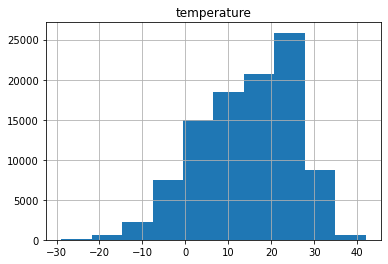

In [16]:
weather.hist(column = 'temperature'); #skewed left

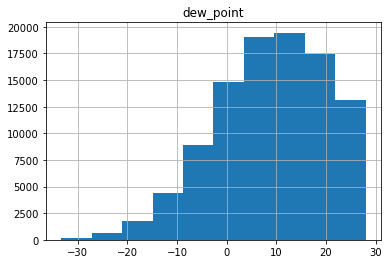

In [17]:
weather.hist(column = 'dew_point'); #skewed left

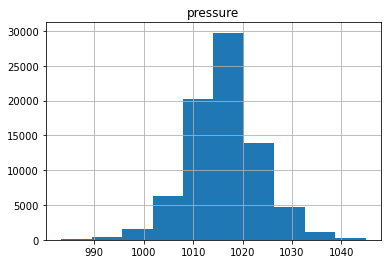

In [18]:
weather.hist(column = 'pressure'); #skewed normal

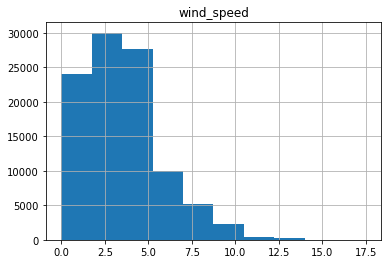

In [19]:
weather.hist(column = 'wind_speed'); #skewed right

12. Draw a bar chart that shows average ``temperature`` for different months. Replace month number with month name and format month labels in a way that is readable by rotating them 30 degrees (20 points).

In [20]:
weather['month'] = pd.to_datetime(weather['month'], format='%m').dt.month_name().str.slice(stop=3)
weather.head()

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,...,USAF,WBAN,STATION NAME,CTRY,ST CALL,LAT,LON,ELEV(M),BEGIN,END
0,841170-99999,2010.0,Jan,15.0,16.0,27.0,21.0,NaN,30.0,5.1,...,841170,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329
1,841170-99999,2010.0,Jan,15.0,17.0,27.0,21.0,NaN,31.0,5.7,...,841170,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329
2,841170-99999,2010.0,Jan,15.0,18.0,27.6,20.8,1011.5,31.0,5.1,...,841170,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329
3,841170-99999,2010.0,Jan,15.0,19.0,28.0,22.0,NaN,32.0,6.2,...,841170,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329
4,841170-99999,2010.0,Jan,15.0,20.0,28.0,22.0,NaN,30.0,7.2,...,841170,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329


NameError: name 'weather_names' is not defined

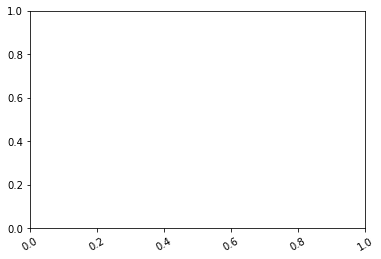

In [21]:
weather.groupby('month', as_index=False)['temperature'].mean()
plt.xticks(rotation = 30)
sns.barplot('month', 'temperature', data=weather_names, ci=False)

13. Plot a line chart that shows average ``temperature`` over time. The x-axis should contain a label for every other year (15 points).

<AxesSubplot:xlabel='year', ylabel='temperature'>

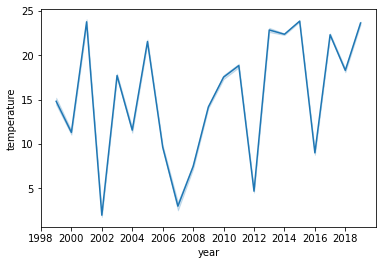

In [22]:
weather_year = weather
weather_year.groupby('year', as_index = False)['temperature'].mean()
plt.xticks(np.arange(0, 2019, 2)) 
sns.lineplot(x = 'year', y = 'temperature', data=weather_year)

14. Select the top 10 stations that have the most number of records. Draw a bar chat that shows the number of records for each of the 10 station (20 points).

In [30]:
station_top = weather['STATION NAME'].value_counts()[:10]
station_top

PITTSBURGH INTERNATIONAL AIRP    7994
ELOY ALFARO INTL                 7712
HECTOR INTERNATIONAL AIRPORT     6580
MCCHORD AFB AIRPORT              5872
BIRMINGHAM INTERNATIONAL AIRP    5848
PORTLAND INTERNATIONAL AIRPOR    4828
CATANIA/SIGONELLA                4315
OFFUTT AFB AIRPORT               4125
SPOKANE INTERNATIONAL AIRPORT    3722
GRISSOM AFB AIRPORT              3687
Name: STATION NAME, dtype: int64

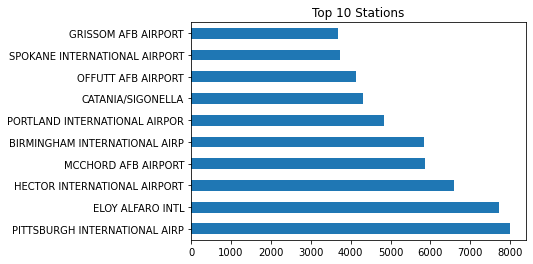

In [31]:
station_top = weather['STATION NAME'].value_counts()[:10]
station_top.plot.barh(stacked=True, title="Top 10 Stations");

15. Add a new column named ``season`` which is calculated based on month. Use Jun-Aug for summer, Dec-Feb for winter and so on (15 points).

In [33]:
season_dict = {'Jan': 'Winter',
               'Feb': 'Winter',
               'Mar': 'Spring', 
               'Apr': 'Spring',
               'May': 'Spring',
               'Jun': 'Summer',
               'Jul': 'Summer',
               'Aug': 'Summer',
               'Sep': 'Fall',
               'Oct': 'Fall',
               'Nov': 'Fall',
               'Dec': 'Winter'}
weather['season'] = weather['month'].apply(lambda x: season_dict[x])
weather.head()

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,...,WBAN,STATION NAME,CTRY,ST CALL,LAT,LON,ELEV(M),BEGIN,END,season
0,841170-99999,2010.0,Jan,15.0,16.0,27.0,21.0,NaN,30.0,5.1,...,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329,Winter
1,841170-99999,2010.0,Jan,15.0,17.0,27.0,21.0,NaN,31.0,5.7,...,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329,Winter
2,841170-99999,2010.0,Jan,15.0,18.0,27.6,20.8,1011.5,31.0,5.1,...,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329,Winter
3,841170-99999,2010.0,Jan,15.0,19.0,28.0,22.0,NaN,32.0,6.2,...,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329,Winter
4,841170-99999,2010.0,Jan,15.0,20.0,28.0,22.0,NaN,30.0,7.2,...,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329,Winter


16. For the top 10 stations calculated in previous steps, draw a bar chart that shows average ``temperature`` for each season for each station (15 points).

In [ ]:
top10names = {'PITTSBURGH INTERNATIONAL AIRP',
             'ELOY ALFARO INTL',
             'HECTOR INTERNATIONAL AIRPORT',
             'MCCHORD AFB AIRPORT',
             'BIRMINGHAM INTERNATIONAL AIRP',
             'PORTLAND INTERNATIONAL AIRPOR',
             'CATANIA/SIGONELLA',
             'OFFUTT AFB AIRPORT',
             'SPOKANE INTERNATIONAL AIRPORT',
             'GRISSOM AFB AIRPORT'}
weather('STATION NAME').loc[['PITTSBURGH INTERNATIONAL AIRP',
             'ELOY ALFARO INTL',
             'HECTOR INTERNATIONAL AIRPORT',
             'MCCHORD AFB AIRPORT',
             'BIRMINGHAM INTERNATIONAL AIRP',
             'PORTLAND INTERNATIONAL AIRPOR',
             'CATANIA/SIGONELLA',
             'OFFUTT AFB AIRPORT',
             'SPOKANE INTERNATIONAL AIRPORT',
             'GRISSOM AFB AIRPORT']]

17. Draw a pair plot of all weather measures. Put season on color (10 points).

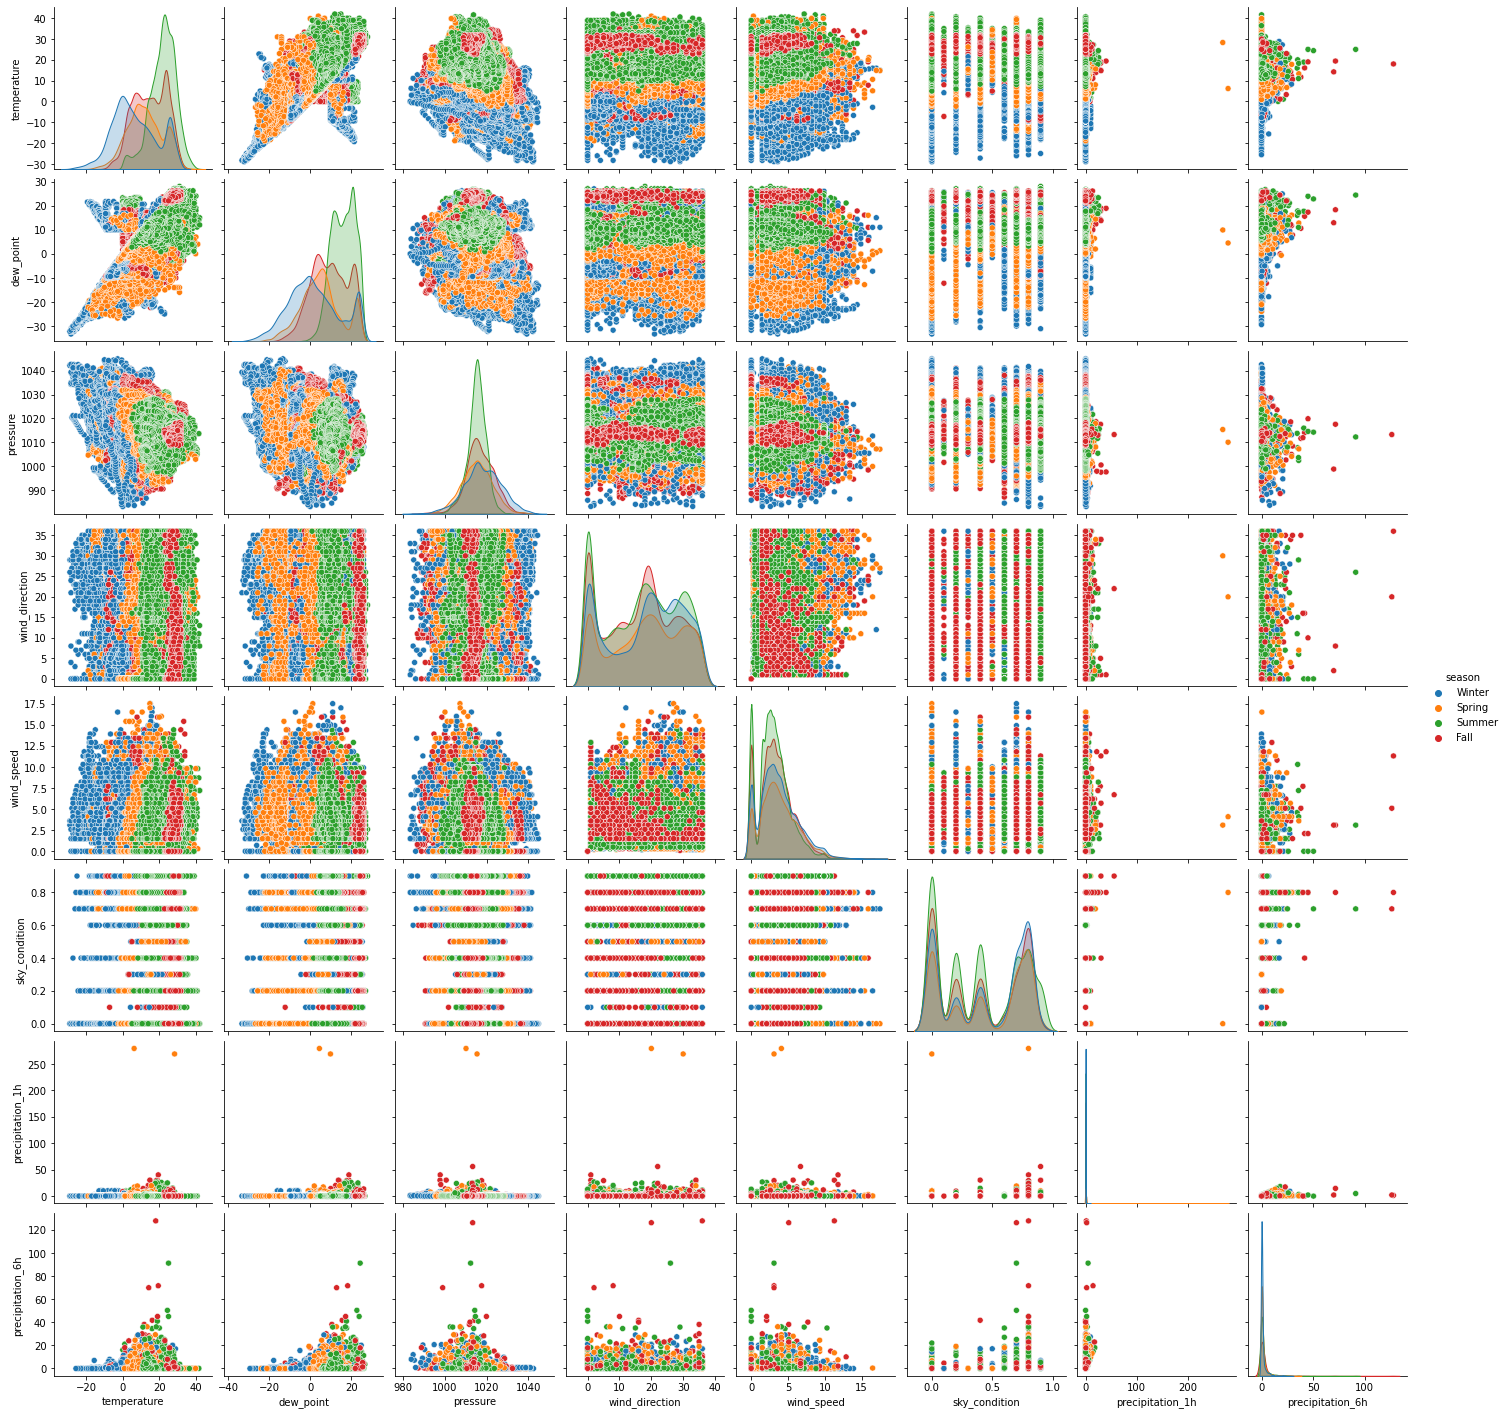

In [34]:
w_measure = weather.drop(columns = ['year','day','hour','station_wban','USAF', 'WBAN','STATION NAME',
                                   'CTRY', 'ST CALL','LAT', 'LON', 'ELEV(M)', 'BEGIN', 'END'])
sns.pairplot(w_measure, hue ='season')
plt.show()

18. Based on what you see above, which columns contain outliers? (10 points)

In [36]:
sorted(w_measure)

Q1 = w_measure.quantile(0.25)
Q3 = w_measure.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

temperature         17.8
dew_point           16.4
pressure             8.3
wind_direction      20.0
wind_speed           2.6
sky_condition        0.8
precipitation_1h     0.0
precipitation_6h     0.8
dtype: float64


19. Exclude all outliers and store the result in a new ``DataFrame`` named ``weather_no_outlier``. Make sure you don't end up with too few records by excluding missing values. Check the shape of your ``DataFrame`` after filtering to make sure you retained most of your data (15 points).

In [37]:
weather_no_outlier = w_measure[~((w_measure < (Q1 - 1.5 * IQR)) |(w_measure > (Q3 + 1.5 * IQR))).any(axis=1)]
weather_no_outlier

/var/folders/8l/lhrf8gys7c7g6xhd9ss7kw480000gn/T/ipykernel_86596/565529913.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  weather_no_outlier = w_measure[~((w_measure < (Q1 - 1.5 * IQR)) |(w_measure > (Q3 + 1.5 * IQR))).any(axis=1)]


,month,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,season
0,Jan,27.0,21.0,NaN,30.0,5.1,0.7,NaN,NaN,Winter
1,Jan,27.0,21.0,NaN,31.0,5.7,0.7,NaN,NaN,Winter
2,Jan,27.6,20.8,1011.5,31.0,5.1,0.7,NaN,NaN,Winter
3,Jan,28.0,22.0,NaN,32.0,6.2,0.7,NaN,NaN,Winter
4,Jan,28.0,22.0,NaN,30.0,7.2,0.7,NaN,NaN,Winter
...,...,...,...,...,...,...,...,...,...,...
99994,Sep,30.6,23.9,1009.0,5.0,4.1,0.2,0.0,NaN,Fall
99995,Sep,30.6,23.9,1008.8,3.0,4.6,0.0,0.0,NaN,Fall
99996,Sep,28.9,23.3,1009.2,3.0,3.6,0.2,0.0,NaN,Fall
99997,Sep,27.2,23.9,1009.3,36.0,2.1,0.0,0.0,NaN,Fall


20. Rerun the pair plot to see how it changed after outlier removal (1 points).

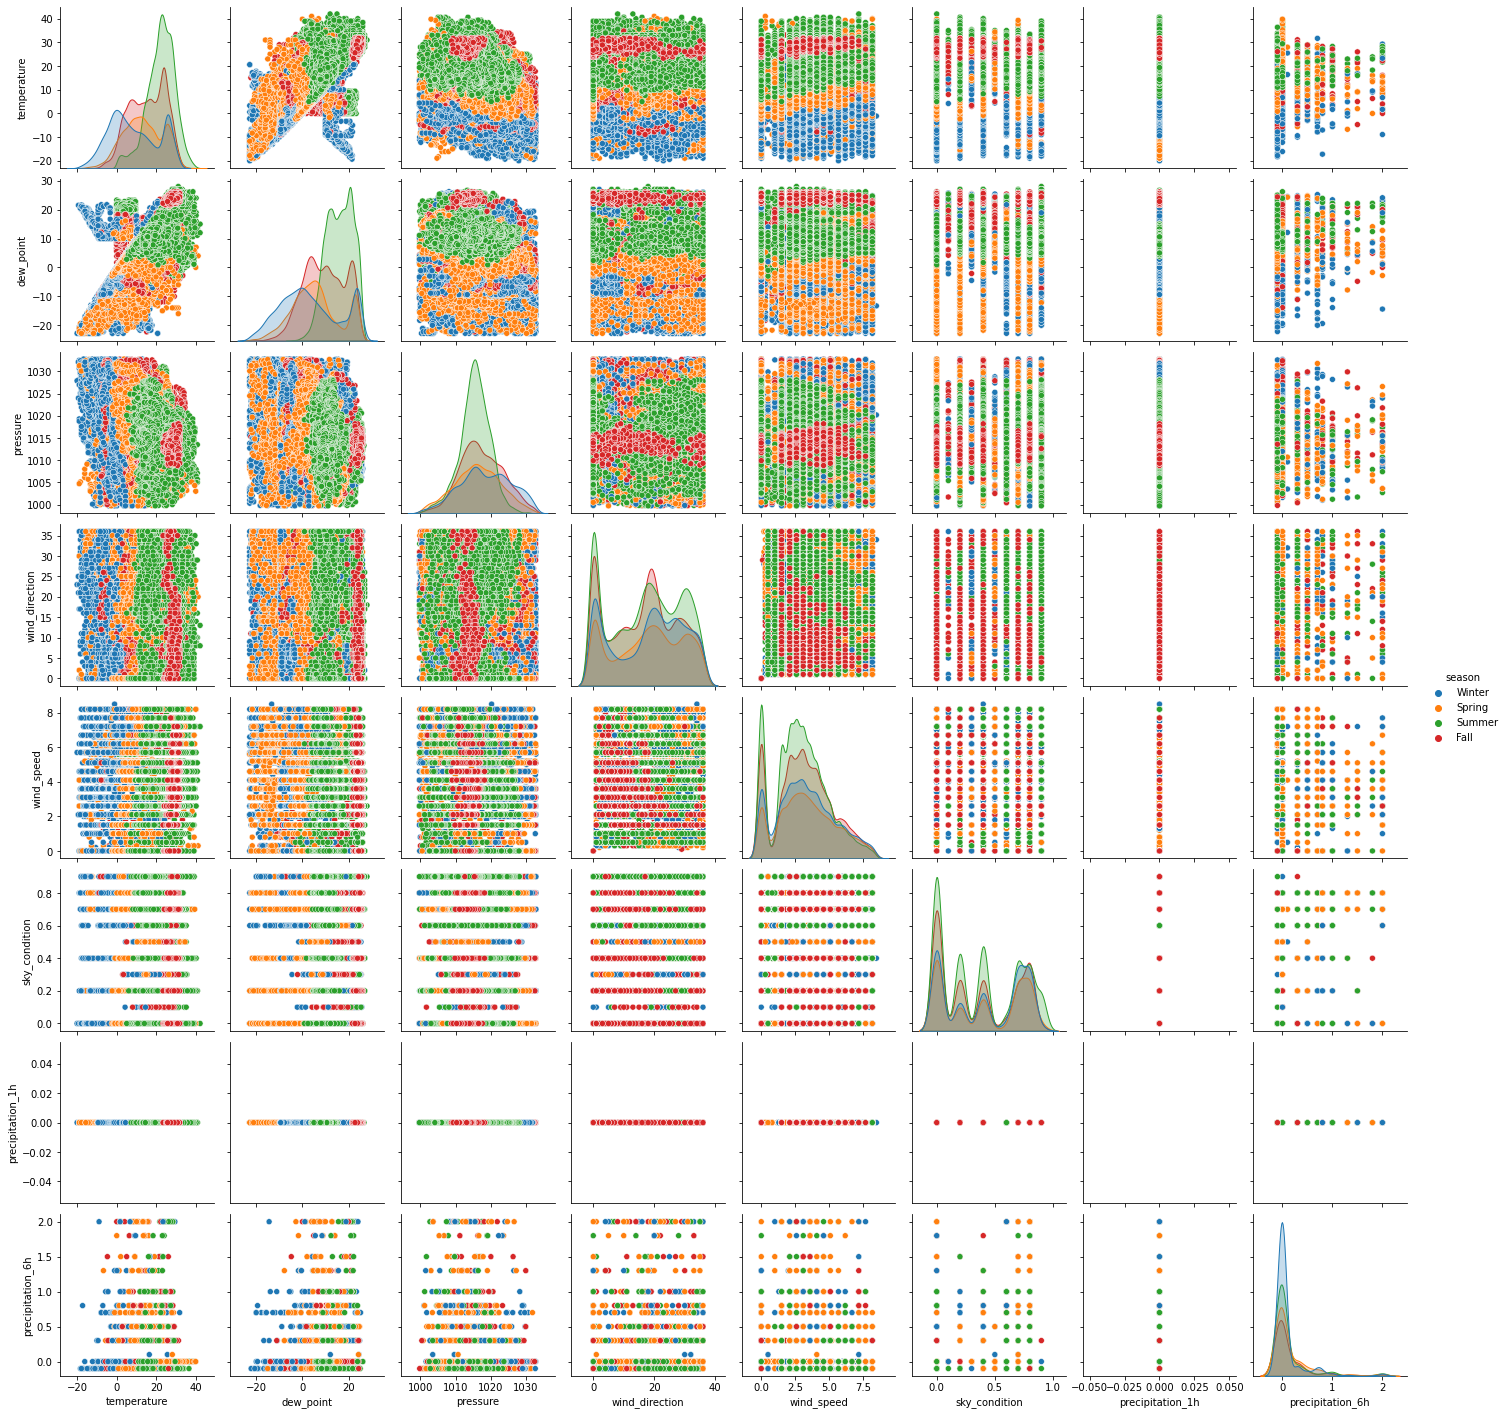

In [139]:
sns.pairplot(weather_no_outlier, hue ='season')
plt.show()

21. Do any two of these measures seem to be related? (10 points)

22. Below write anything the catches your eye in the charts above (10 points).

23. Replace all missing values with the value from the previous record (15 points).

In [38]:
weather_no_outlier.fillna(method='bfill')
weather.fillna(method = 'bfill')

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,...,WBAN,STATION NAME,CTRY,ST CALL,LAT,LON,ELEV(M),BEGIN,END,season
0,841170-99999,2010.0,Jan,15.0,16.0,27.0,21.0,1011.5,30.0,5.1,...,99999,ELOY ALFARO INTL,EC,SEMT,-0.950,-80.683,14.6,19770701,20200329,Winter
1,841170-99999,2010.0,Jan,15.0,17.0,27.0,21.0,1011.5,31.0,5.7,...,99999,ELOY ALFARO INTL,EC,SEMT,-0.950,-80.683,14.6,19770701,20200329,Winter
2,841170-99999,2010.0,Jan,15.0,18.0,27.6,20.8,1011.5,31.0,5.1,...,99999,ELOY ALFARO INTL,EC,SEMT,-0.950,-80.683,14.6,19770701,20200329,Winter
3,841170-99999,2010.0,Jan,15.0,19.0,28.0,22.0,1008.1,32.0,6.2,...,99999,ELOY ALFARO INTL,EC,SEMT,-0.950,-80.683,14.6,19770701,20200329,Winter
4,841170-99999,2010.0,Jan,15.0,20.0,28.0,22.0,1008.1,30.0,7.2,...,99999,ELOY ALFARO INTL,EC,SEMT,-0.950,-80.683,14.6,19770701,20200329,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,785350-11630,2011.0,Sep,29.0,20.0,30.6,23.9,1008.8,3.0,4.6,...,11630,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR,18.255,-65.641,10.1,19730101,20200330,Fall
99996,785350-11630,2011.0,Sep,29.0,21.0,28.9,23.3,1009.2,3.0,3.6,...,11630,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR,18.255,-65.641,10.1,19730101,20200330,Fall
99997,785350-11630,2011.0,Sep,29.0,22.0,27.2,23.9,1009.3,36.0,2.1,...,11630,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR,18.255,-65.641,10.1,19730101,20200330,Fall
99998,785350-11630,2011.0,Sep,29.0,23.0,25.6,22.8,1010.3,25.0,4.1,...,11630,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR,18.255,-65.641,10.1,19730101,20200330,Fall


24. Replace the remaining missing values with the value from the next record (15 points).

In [39]:
weather_no_outlier.fillna(method = 'ffill')
weather.fillna(method = 'ffill')

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,...,WBAN,STATION NAME,CTRY,ST CALL,LAT,LON,ELEV(M),BEGIN,END,season
0,841170-99999,2010.0,Jan,15.0,16.0,27.0,21.0,NaN,30.0,5.1,...,99999,ELOY ALFARO INTL,EC,SEMT,-0.950,-80.683,14.6,19770701,20200329,Winter
1,841170-99999,2010.0,Jan,15.0,17.0,27.0,21.0,NaN,31.0,5.7,...,99999,ELOY ALFARO INTL,EC,SEMT,-0.950,-80.683,14.6,19770701,20200329,Winter
2,841170-99999,2010.0,Jan,15.0,18.0,27.6,20.8,1011.5,31.0,5.1,...,99999,ELOY ALFARO INTL,EC,SEMT,-0.950,-80.683,14.6,19770701,20200329,Winter
3,841170-99999,2010.0,Jan,15.0,19.0,28.0,22.0,1011.5,32.0,6.2,...,99999,ELOY ALFARO INTL,EC,SEMT,-0.950,-80.683,14.6,19770701,20200329,Winter
4,841170-99999,2010.0,Jan,15.0,20.0,28.0,22.0,1011.5,30.0,7.2,...,99999,ELOY ALFARO INTL,EC,SEMT,-0.950,-80.683,14.6,19770701,20200329,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,785350-11630,2011.0,Sep,29.0,20.0,30.6,23.9,1008.8,3.0,4.6,...,11630,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR,18.255,-65.641,10.1,19730101,20200330,Fall
99996,785350-11630,2011.0,Sep,29.0,21.0,28.9,23.3,1009.2,3.0,3.6,...,11630,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR,18.255,-65.641,10.1,19730101,20200330,Fall
99997,785350-11630,2011.0,Sep,29.0,22.0,27.2,23.9,1009.3,36.0,2.1,...,11630,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR,18.255,-65.641,10.1,19730101,20200330,Fall
99998,785350-11630,2011.0,Sep,29.0,23.0,25.6,22.8,1010.3,25.0,4.1,...,11630,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR,18.255,-65.641,10.1,19730101,20200330,Fall


25. Are there any missing values left? If yes, replace them with the mean of the station (10 points).

In [40]:
weather.isna().sum()
#yes there missing values left

station_wban            0
year                    0
month                   0
day                     0
hour                    0
temperature           289
dew_point             302
pressure            21683
wind_direction       2499
wind_speed             63
sky_condition       18430
precipitation_1h    45574
precipitation_6h    95137
USAF                    0
WBAN                    0
STATION NAME            0
CTRY                    0
ST CALL                 0
LAT                     0
LON                     0
ELEV(M)                 0
BEGIN                   0
END                     0
season                  0
dtype: int64

In [42]:
weather.fillna(weather.mean(), inplace=True)
weather.isna().sum()

/var/folders/8l/lhrf8gys7c7g6xhd9ss7kw480000gn/T/ipykernel_86596/2943294664.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weather.fillna(weather.mean(), inplace=True)


station_wban        0
year                0
month               0
day                 0
hour                0
temperature         0
dew_point           0
pressure            0
wind_direction      0
wind_speed          0
sky_condition       0
precipitation_1h    0
precipitation_6h    0
USAF                0
WBAN                0
STATION NAME        0
CTRY                0
ST CALL             0
LAT                 0
LON                 0
ELEV(M)             0
BEGIN               0
END                 0
season              0
dtype: int64

26. Create a new ``DataFrame`` named ``normalized_df`` that contains normalized values of all measures of ``weather`` ``DataFrame``. ``normalized_df`` must contain the same columns as ``weather`` but all weather measures are normalized (10 points).

In [170]:
normalized_df = (weather - weather.mean()) / weather.std()
normalized_df

/var/folders/8l/lhrf8gys7c7g6xhd9ss7kw480000gn/T/ipykernel_83081/623875863.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normalized_df = (weather - weather.mean()) / weather.std()


,BEGIN,CTRY,ELEV(M),END,LAT,LON,ST CALL,STATION NAME,USAF,WBAN,...,precipitation_1h,precipitation_6h,pressure,season,sky_condition,station_wban,temperature,wind_direction,wind_speed,year
0,1.032249,NaN,-0.621246,0.300482,-2.588140,-0.023644,NaN,NaN,0.961292,1.252927,...,-2.066238e-15,-8.065093e-13,-1.364318e-11,NaN,0.944461,NaN,1.138991,1.136215,0.713274,0.118869
1,1.032249,NaN,-0.621246,0.300482,-2.588140,-0.023644,NaN,NaN,0.961292,1.252927,...,-2.066238e-15,-8.065093e-13,-1.364318e-11,NaN,0.944461,NaN,1.138991,1.225931,0.967183,0.118869
2,1.032249,NaN,-0.621246,0.300482,-2.588140,-0.023644,NaN,NaN,0.961292,1.252927,...,-2.066238e-15,-8.065093e-13,-7.429756e-01,NaN,0.944461,NaN,1.193294,1.225931,0.713274,0.118869
3,1.032249,NaN,-0.621246,0.300482,-2.588140,-0.023644,NaN,NaN,0.961292,1.252927,...,-2.066238e-15,-8.065093e-13,-1.364318e-11,NaN,0.944461,NaN,1.229496,1.315646,1.178774,0.118869
4,1.032249,NaN,-0.621246,0.300482,-2.588140,-0.023644,NaN,NaN,0.961292,1.252927,...,-2.066238e-15,-8.065093e-13,-1.364318e-11,NaN,0.944461,NaN,1.229496,1.136215,1.601956,0.118869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.832645,NaN,-0.632167,0.300507,-1.242589,0.251216,NaN,NaN,0.592846,-1.006075,...,-9.508756e-02,-8.065093e-13,-1.169315e+00,NaN,-1.375053,NaN,1.464812,-1.286093,0.501684,0.300801
99996,0.832645,NaN,-0.632167,0.300507,-1.242589,0.251216,NaN,NaN,0.592846,-1.006075,...,-9.508756e-02,-8.065093e-13,-1.106154e+00,NaN,-0.712335,NaN,1.310952,-1.286093,0.078502,0.300801
99997,0.832645,NaN,-0.632167,0.300507,-1.242589,0.251216,NaN,NaN,0.592846,-1.006075,...,-9.508756e-02,-8.065093e-13,-1.090363e+00,NaN,-1.375053,NaN,1.157092,1.674506,-0.556270,0.300801
99998,0.832645,NaN,-0.632167,0.300507,-1.242589,0.251216,NaN,NaN,0.592846,-1.006075,...,-9.508756e-02,-8.065093e-13,-9.324598e-01,NaN,-1.375053,NaN,1.012282,0.687640,0.290093,0.300801


27. In ``normalized_df``, convert all categorical varaibles, except for ``station_wban``, to dummies (10 points).

In [172]:
pd.get_dummies(normalized_df,
                     columns = ['CTRY', 'ST CALL', 'STATION NAME', 'month', 'season'])

,BEGIN,ELEV(M),END,LAT,LON,USAF,WBAN,day,dew_point,hour,precipitation_1h,precipitation_6h,pressure,sky_condition,station_wban,temperature,wind_direction,wind_speed,year
0,1.032249,-0.621246,0.300482,-2.588140,-0.023644,0.961292,1.252927,-0.098646,1.130437,0.652049,-2.066238e-15,-8.065093e-13,-1.364318e-11,0.944461,NaN,1.138991,1.136215,0.713274,0.118869
1,1.032249,-0.621246,0.300482,-2.588140,-0.023644,0.961292,1.252927,-0.098646,1.130437,0.796428,-2.066238e-15,-8.065093e-13,-1.364318e-11,0.944461,NaN,1.138991,1.225931,0.967183,0.118869
2,1.032249,-0.621246,0.300482,-2.588140,-0.023644,0.961292,1.252927,-0.098646,1.111986,0.940808,-2.066238e-15,-8.065093e-13,-7.429756e-01,0.944461,NaN,1.193294,1.225931,0.713274,0.118869
3,1.032249,-0.621246,0.300482,-2.588140,-0.023644,0.961292,1.252927,-0.098646,1.222689,1.085187,-2.066238e-15,-8.065093e-13,-1.364318e-11,0.944461,NaN,1.229496,1.315646,1.178774,0.118869
4,1.032249,-0.621246,0.300482,-2.588140,-0.023644,0.961292,1.252927,-0.098646,1.222689,1.229567,-2.066238e-15,-8.065093e-13,-1.364318e-11,0.944461,NaN,1.229496,1.136215,1.601956,0.118869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.832645,-0.632167,0.300507,-1.242589,0.251216,0.592846,-1.006075,1.486506,1.397969,1.229567,-9.508756e-02,-8.065093e-13,-1.169315e+00,-1.375053,NaN,1.464812,-1.286093,0.501684,0.300801
99996,0.832645,-0.632167,0.300507,-1.242589,0.251216,0.592846,-1.006075,1.486506,1.342617,1.373946,-9.508756e-02,-8.065093e-13,-1.106154e+00,-0.712335,NaN,1.310952,-1.286093,0.078502,0.300801
99997,0.832645,-0.632167,0.300507,-1.242589,0.251216,0.592846,-1.006075,1.486506,1.397969,1.518325,-9.508756e-02,-8.065093e-13,-1.090363e+00,-1.375053,NaN,1.157092,1.674506,-0.556270,0.300801
99998,0.832645,-0.632167,0.300507,-1.242589,0.251216,0.592846,-1.006075,1.486506,1.296491,1.662705,-9.508756e-02,-8.065093e-13,-9.324598e-01,-1.375053,NaN,1.012282,0.687640,0.290093,0.300801


28. Check the head of ``normalized_df`` (5 points).

In [167]:
normalized_df.head

<bound method NDFrame.head of           BEGIN CTRY   ELEV(M)       END       LAT       LON ST CALL  \
0      1.032249  NaN -0.621246  0.300482 -2.588140 -0.023644     NaN   
1      1.032249  NaN -0.621246  0.300482 -2.588140 -0.023644     NaN   
2      1.032249  NaN -0.621246  0.300482 -2.588140 -0.023644     NaN   
3      1.032249  NaN -0.621246  0.300482 -2.588140 -0.023644     NaN   
4      1.032249  NaN -0.621246  0.300482 -2.588140 -0.023644     NaN   
...         ...  ...       ...       ...       ...       ...     ...   
99995  0.832645  NaN -0.632167  0.300507 -1.242589  0.251216     NaN   
99996  0.832645  NaN -0.632167  0.300507 -1.242589  0.251216     NaN   
99997  0.832645  NaN -0.632167  0.300507 -1.242589  0.251216     NaN   
99998  0.832645  NaN -0.632167  0.300507 -1.242589  0.251216     NaN   
99999  0.832645  NaN -0.632167  0.300507 -1.242589  0.251216     NaN   

      STATION NAME      USAF      WBAN  ...  precipitation_1h  \
0              NaN  0.961292  1.252927  